In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
import seaborn as sns
import os
import cv2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
from sklearn.model_selection import train_test_split

In [27]:
# Define os caminhos para os dados de treino e teste
source_path_train = './Treinamento/'
source_path_test ='./Teste/'

# Obtém a lista de categorias (classes) do diretório de treino
categories = os.listdir(source_path_train)

# Exibe as classes
for category in categories:
    os.listdir(os.path.join(source_path_train,category))

# Define um dicionário para mapear as classes para rótulos numéricos
classes = {'glioma_tumor':0, 'meningioma_tumor':1, 'no_tumor':2, 'pituitary_tumor':3 }
classes

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

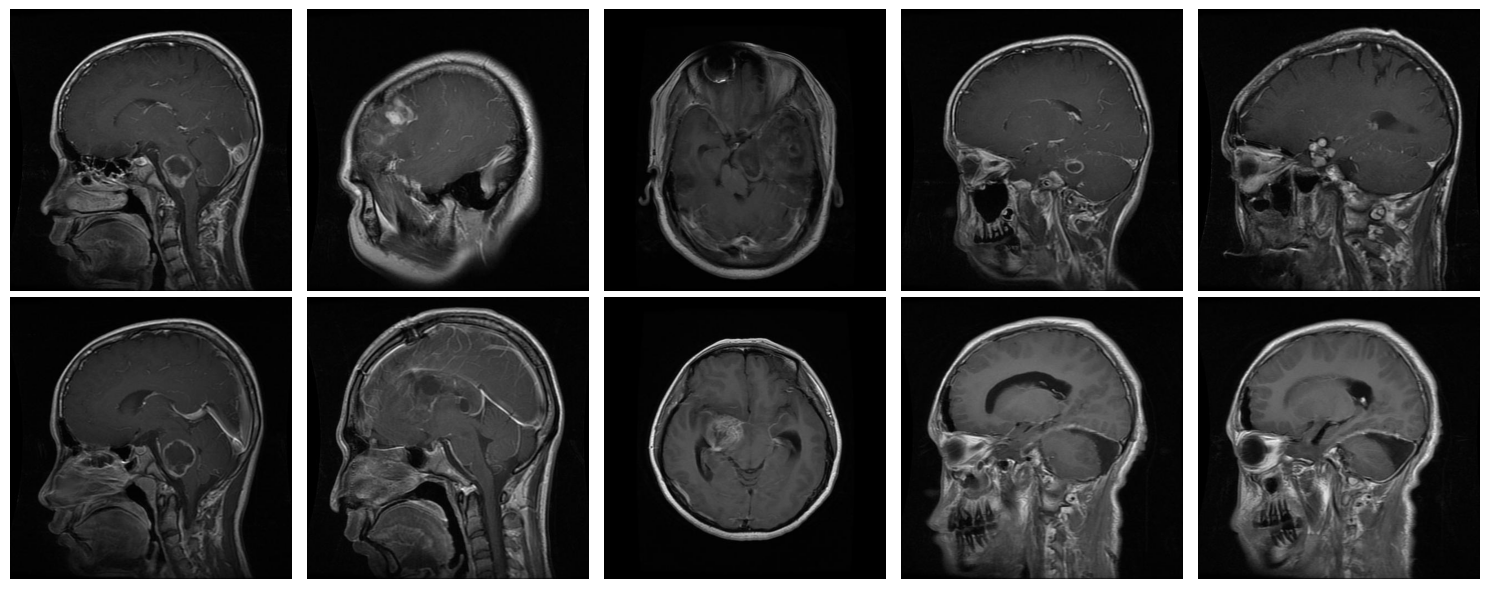

In [28]:
# Visualiza imagens aleatórias de uma classe específica (glioma_tumor)
path_image= './Treinamento/tumor_glioma/'
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6)) #plota 2 linhas e 5 colunas de imagens de tamanho 15x6 polegadas
random_indices = random.sample(range(1, 101), 10) #indices gerado para escolher as 10 imagens aleatoriamente

for i, idx in enumerate(random_indices, 1):
    file_path = os.path.join(path_image, f'gg ({idx}).jpg') #cria o caminho completo para o arquivo de imagem a ser exibido. caminho= "'path_image'+'gg(índice).jpg'"
    image = Image.open(file_path)
    subplot_row = (i - 1) // 5 #define a linha onde será exibida
    subplot_col = (i - 1) % 5  #define a coluna onde será exibida
    axes[subplot_row, subplot_col].imshow(image) #exibe a imagem na posição especificada
    axes[subplot_row, subplot_col].axis('off') # tira as margens (eixos x e y) dos subplots
plt.tight_layout() # Ajusta automaticamente o espaçamento entre os subplots
plt.show() #mostra

In [29]:
classes = {'tumor_glioma':0, 'tumor_meningioma':1, 'sem_tumor':2, 'tumor_pituitária':3 }

In [30]:
X = []
Y = []

# Carrega imagens do conjunto de treino
for cls in classes:
    pth = source_path_train + '//' + cls   #caminho = './Training/' + '//' + tipo_tumor
    for j in os.listdir(pth): # percorre todos os arquivos do caminho
        img = cv2.imread(pth + '//' + j, 0) #lê imagem (j) na escala cinza (0)
        img = cv2.resize(img, (200, 200)) #redimensiona a imagem para 200x200 pixels
        X.append(img) #add a imagem na lista X
        Y.append(classes[cls]) #adciona o nome da classe da imagem na lista Y

# Carrega imagens do conjunto de teste (mesmo procedimento feito em cima)
for cls in classes:
    pth = source_path_test + '//' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '//' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

# Converte os dados (de X e Y) para arrays numpy
X = np.array(X)
Y = np.array(Y)

# Exibe a contagem de cada classe no conjunto de dados (quantas imagens tem de cada tipo de tumor)
pd.Series(Y).value_counts()

1    937
0    926
3    901
2    500
Name: count, dtype: int64

In [31]:
# Reformula os dados
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3264, 40000)

In [32]:
# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, random_state = 10, test_size = 0.20) # 20% teste; 80% treino

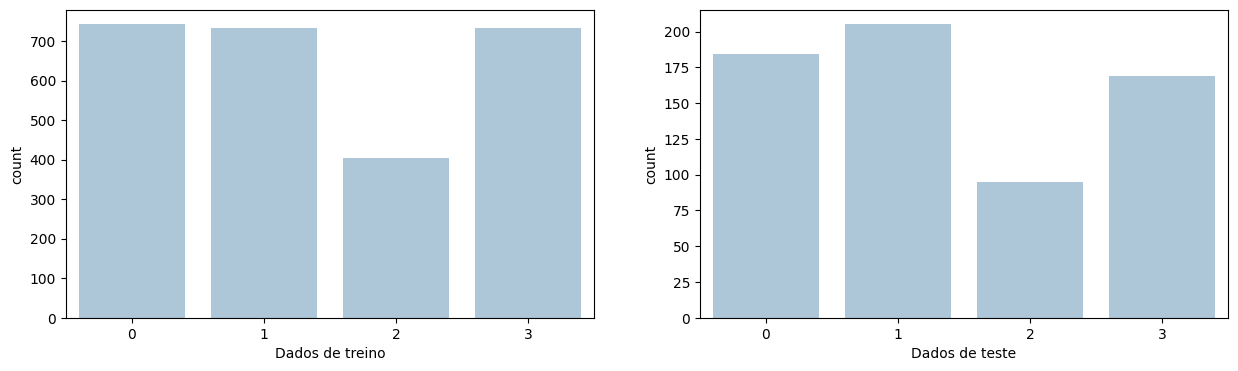

In [33]:
# Visualiza a distribuição das classes nos conjuntos de treino e teste
plt.figure(figsize = (15,4)); # Define tamanho da figura (15x4)
lis = ['Dados de treino', 'Dados de teste'] # lis é definida com os rótulos de dados (treino e teste)
for i,j in enumerate([y_train, y_test]): #iteração dos dados (i=treino e j=teste)
    plt.subplot(1,2, i+1); # divide a imagem em 1 linha e 2 colunas (2 gráficos). i+1 serve para calcular qual é o índice do subplot atual (1 ou 2)
    sns.countplot(x = j,alpha=0.4 ); #eixo x do gráfico é definido como j, que representa os rótulos das classes (treino na 1a e teste na 2a iteração)
    plt.xlabel(lis[i]) #define os nomes dos gráficos - lis[i] (i pode ser: 0=treino; 1=teste)

In [34]:
# Reformula os dados de treino e teste
X_train_updated = X_train.reshape(len(X_train), -1) # reformula o array. len(X_train)=número de amostras.
X_test_updated = X_test.reshape(len(X_test), -1) #igual o de cima, mas para teste.

#X_train_updated/X_teste_updated será uma matriz bidimensional em que cada linha representa uma amostra e as colunas representam as características

print("Formatos (L, C) das matrizes:\n    treino          teste")
X_train_updated.shape, X_test_updated.shape #imprime as formas (número de linhas e colunas) das matrizes

Formatos (L, C) das matrizes:
    treino          teste


((2611, 40000), (653, 40000))

In [35]:
# Normaliza os valores dos pixels para o intervalo [0, 1]
print(X_train_updated.max(), X_train_updated.min()) # Imprime o valor máximo e mínimo dos pixels na matriz X_train_updated. Serve pra verificar os valores originais dos pixels antes da normalização.
print(X_test_updated.max(), X_test_updated.min())   # Igual, mas pra teste
X_train_updated = X_train_updated/255 # Divide todos os valores dos pixels na matriz por 255
X_test_updated = X_test_updated/255   # Igual, mas pra teste
print(X_train_updated.max(), X_train_updated.min()) # Printa os novos valores (dividido por 255)
print(X_test_updated.max(), X_test_updated.min()) # Printa os novos valores (dividido por 255)

255 0
255 0
1.0 0.0
1.0 0.0


In [36]:
names = []
accuracies = []
finalResults = []

## Algoritmo KNN

In [40]:
# Treina um classificador K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=3) # Cria um objeto KNN, com n=3. O KNN usará os 3 vizinhos mais próximos para fazer suas previsões.
knn.fit(X_train_updated, y_train) # O classificador KNN é treinado com os dados de treinamento X_train_updated e os rótulos de classe y_train.
y_pred =knn.predict(X_test_updated) # O classificador KNN faz previsões usando os dados de teste X_test_updated e armazena as previsões em y_pred

# Avalia o desempenho do classificador
accuracy = accuracy_score( y_test,y_pred) # Calcula a precisão do modelo comparando as previsões (y_pred) com os rótulos reais do teste (y_test). Precisão = previsões corretas/total.
CM_knn = confusion_matrix(y_test, y_pred) # Calcula a matriz de confusão (informações sobre quantas previsões caíram em cada uma das classes e quantas foram classificadas corretamente ou incorretamente).

# Exibe os resultados
print("Accuracy : ", accuracy * 100, '%')
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport)
name ='KNN'
names.append(name)
accuracies.append(accuracy)
finalResults.append((name,accuracy))

# Precision: é a proporção de previsões positivas que estavam realmente corretas. Ex: de todas as previsões de glioma_tumor, quantas realmente eram glioma_tumor?

# Recall: é a proporção de positivos reais que foram corretamente classificados. Ex: de todas as imagens de glioma_tumor, quantas foram classificadas corretamente como glioma_tumor?

# F1-score: é uma média ponderada de Precision e Recall. F1-score é 2*(Recall * Precision) / (Recall + Precision)

# Support: é o número de ocorrências reais da classe na base de dados especificada.

# Accuracy: é a proporção de previsões corretas em relação ao número total de previsões. Ex: de todas as previsões, quantas estavam corretas?

# Macro avg: é a média não ponderada das métricas de cada classe. Ex: (Precision_glioma_tumor + Precision_meningioma_tumor + Precision_no_tumor + Precision_pituitary_tumor)/4

# Weighted avg: é a média ponderada das métricas de cada classe, onde cada classe é ponderada de acordo com o número de ocorrências reais. Ex: (Precision_glioma_tumor*0.25 + Precision_meningioma_tumor*0.25 + Precision_no_tumor*0.25 + Precision_pituitary_tumor*0.25)

Accuracy :  80.55130168453293 %
Classification Report is : 
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       184
           1       0.88      0.65      0.75       205
           2       0.73      0.72      0.72        95
           3       0.85      0.98      0.91       169

    accuracy                           0.81       653
   macro avg       0.80      0.80      0.80       653
weighted avg       0.81      0.81      0.80       653



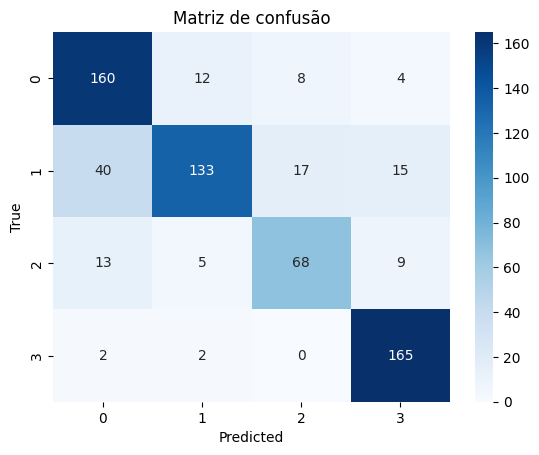

In [38]:
# Visualiza a matriz de confusão
sns.heatmap(CM_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusão")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# A matriz de confusão é uma tabela que mostra as frequências de classificação para cada classe do modelo.
# Cada linha representa as instâncias na classe real, enquanto cada coluna representa as instâncias na classe prevista (ou vice-versa).

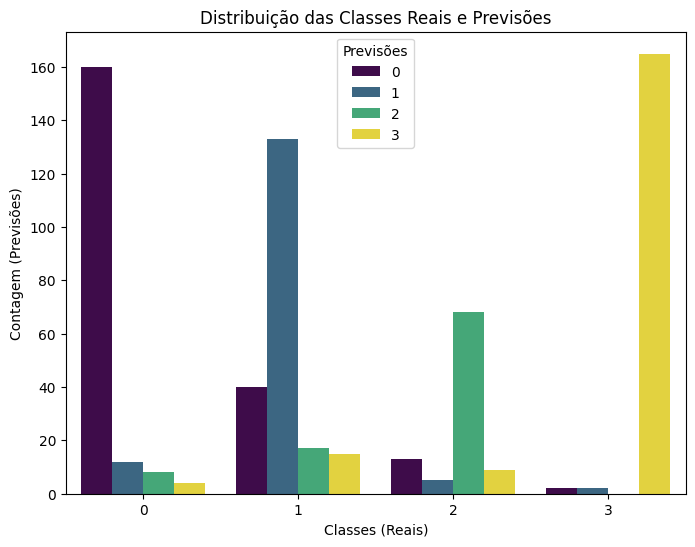

In [53]:
# Crie um DataFrame com os rótulos (classes) e as previsões
df_classes = pd.DataFrame({'Classes': y_test, 'Previsões': y_pred})

# Plote a distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Classes', data=df_classes, palette='viridis', hue='Previsões')
plt.title('Distribuição das Classes Reais e Previsões')
plt.xlabel('Classes (Reais)')
plt.ylabel('Contagem (Previsões)')
plt.show()

{'tumor_glioma': 0, 'tumor_meningioma': 1, 'sem_tumor': 2, 'tumor_pituitária': 3}


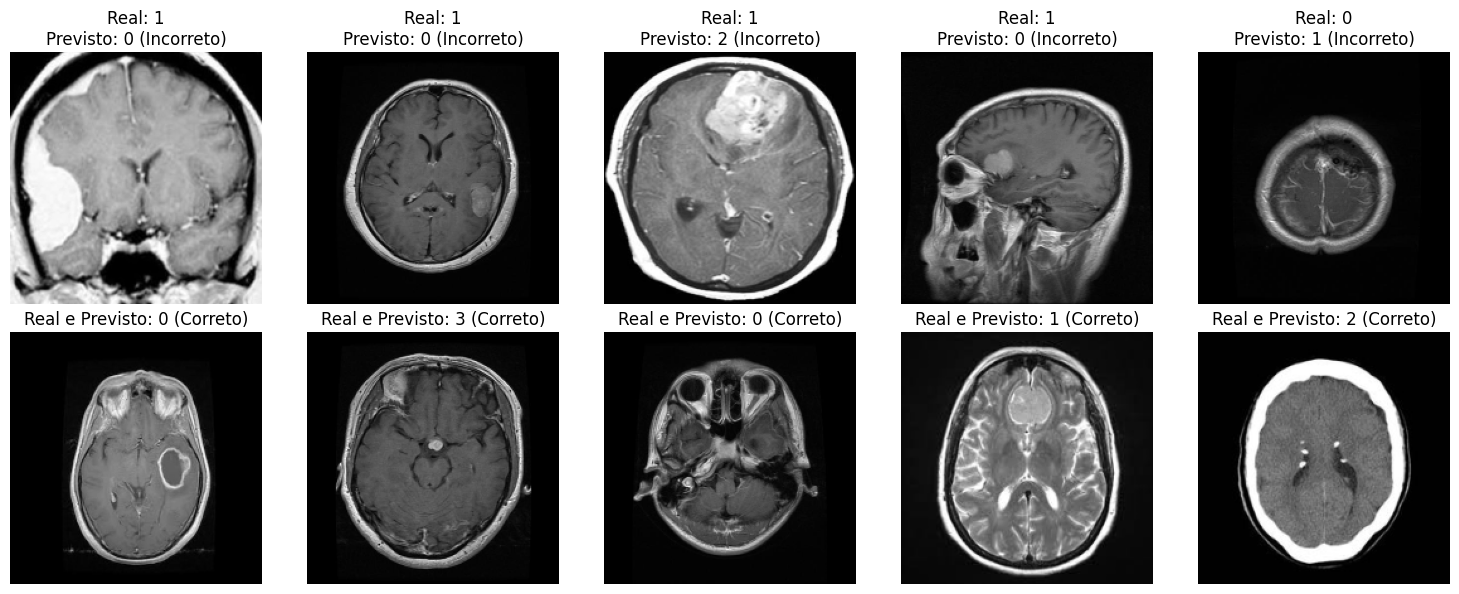

In [69]:
# Encontre índices onde as previsões são diferentes dos rótulos reais
indices_incorretos = np.where(y_pred != y_test)[0]
indices_corretos = np.where(y_pred== y_test)[0]

# Escolha aleatoriamente algumas amostras de previsões incorretas e corretas
amostras_incorretas = random.sample(list(indices_incorretos), min(5, len(indices_incorretos)))
amostras_corretas = random.sample(list(indices_corretos), min(5, len(indices_corretos)))

# Plote as amostras incorretas e corretas
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Plotar amostras incorretas
for i, idx in enumerate(amostras_incorretas, 1):
    imagem_incorreta = X_test[idx].reshape(200, 200)  # Ajuste o tamanho conforme necessário
    r = (i - 1) // 5
    c = (i - 1) % 5
    axes[r, c].imshow(imagem_incorreta, cmap='gray')  # Use cmap='gray' se as imagens são em escala de cinza
    axes[r, c].set_title(f'Real: {y_test[idx]}\nPrevisto: {y_pred[idx]} (Incorreto)')
    axes[r, c].axis('off')

# Plotar amostras corretas
for i, idx in enumerate(amostras_corretas, 1):
    imagem_correta = X_test[idx].reshape(200, 200)  # Ajuste o tamanho conforme necessário
    r = (i + 4) // 5  # Ajuste o índice para começar a partir da 5ª posição
    c = (i + 4) % 5
    axes[r, c].imshow(imagem_correta, cmap='gray')  # Use cmap='gray' se as imagens são em escala de cinza
    axes[r, c].set_title(f'Real e Previsto: {y_test[idx]} (Correto)')
    axes[r, c].axis('off')

print(classes)

plt.tight_layout()
plt.show()
